In [1]:
from ddks.data import *
from ddks.data.openimages_dataset import LS
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
plt.style.use('ah')
plt.show()

In [2]:
def scatter_density(x, y, cmap, **kwargs):
    xy = np.vstack([x, y])
    try:
        z = gaussian_kde(xy)(xy)
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
        alpha = 0.2
    except:
        z = np.ones_like(x)
        z[0] = 0.0
        alpha = 0.5
    plt.scatter(x, y, c=z, edgecolor='none', cmap=cmap, alpha=alpha, **kwargs)
    
def scatter_hist(x, y):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    plt.sca(ax)
    scatter_density(x[:, 0], x[:, 1], cmap='Oranges')
    scatter_density(y[:, 0], y[:, 1], cmap='binary')
    min1 = np.min([x[:,0].min(), y[:, 0].min()])
    max1 = np.max([x[:,0].max(), y[:, 0].max()])
    min2 = np.min([x[:,1].min(), y[:, 1].min()])
    max2 = np.max([x[:,1].max(), y[:, 1].max()])
    n_bins = int(np.sqrt(1000))
    bins_x = np.linspace(min1, max1, n_bins)
    bins_y = np.linspace(min2, max2, n_bins)
    ax_histx.hist(x[:, 0].flatten().numpy(), density=True, color='#D77600', bins=bins_x, alpha=0.2)
    ax_histx.hist(y[:, 0].flatten().numpy(), density=True, color='#616265', bins=bins_x, alpha=0.2)
    ax_histy.hist(x[:, 1].flatten().numpy(), density=True, color='#D77600', orientation='horizontal', bins=bins_y, alpha=0.2)
    ax_histy.hist(y[:, 1].flatten().numpy(), density=True, color='#616265', orientation='horizontal', bins=bins_y, alpha=0.2)
    ax_histx.set_ylabel('Probability' + "\n" 'Density')
    ax_histy.set_xlabel('Probability' + "\n" 'Density')
    #ax_histy.hist(y, bins=bins_y, orientation='horizontal')

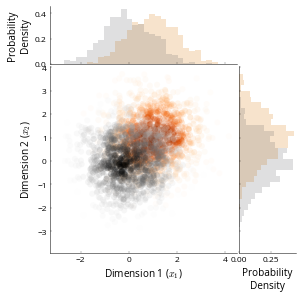

In [3]:
fig = plt.figure(figsize=(4, 4))
gvm = GVM(dimension=2, sample_size=1000)
for p, t in gvm:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('gvm.pdf', bbox_inches='tight')
plt.show()

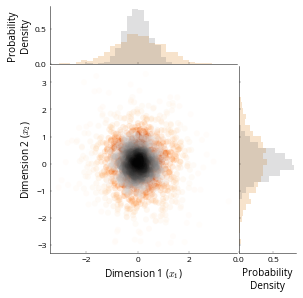

In [4]:
fig = plt.figure(figsize=(4, 4))
gvs = GVS(dimension=2, sample_size=1000)
for p, t in gvs:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('gvs.pdf', bbox_inches='tight')
plt.show()

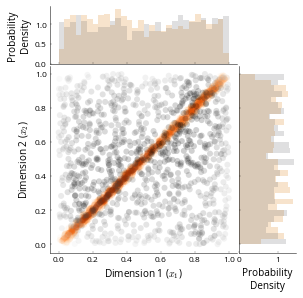

In [11]:
fig = plt.figure(figsize=(4, 4))
dvu = DVU(dimension=2, width_p=0.05, sample_size=1000)
for p, t in dvu:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('dvu.pdf', bbox_inches='tight')
plt.show()

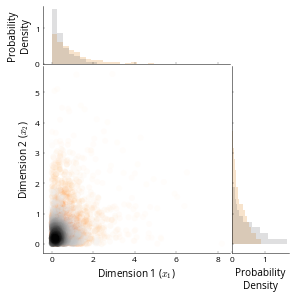

In [6]:
fig = plt.figure(figsize=(4, 4))
skew = Skew(dimension=2, sample_size=1000)
for p, t in skew:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('skew.pdf', bbox_inches='tight')
plt.show()

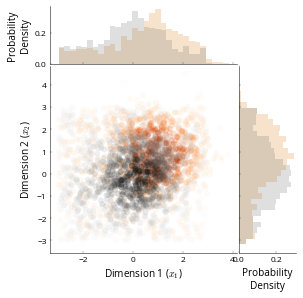

In [7]:
fig = plt.figure(figsize=(4, 4))
mm = MM(dimension=2, sample_size=1000)
for p, t in mm:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('mm.pdf', bbox_inches='tight')
plt.show()

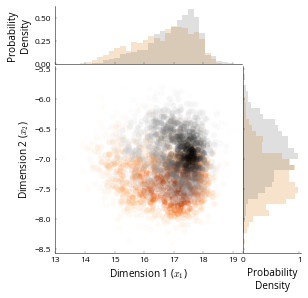

In [8]:
fig = plt.figure(figsize=(4, 4))
mm = LS(dimension=2, sample_size=1000)
for p, t in mm:
    scatter_hist(p, t)
    break
plt.xlabel('Dimension 1 ($x_{1}$)')
plt.ylabel('Dimension 2 ($x_{2}$)')
plt.savefig('ls.pdf', bbox_inches='tight')
plt.show()